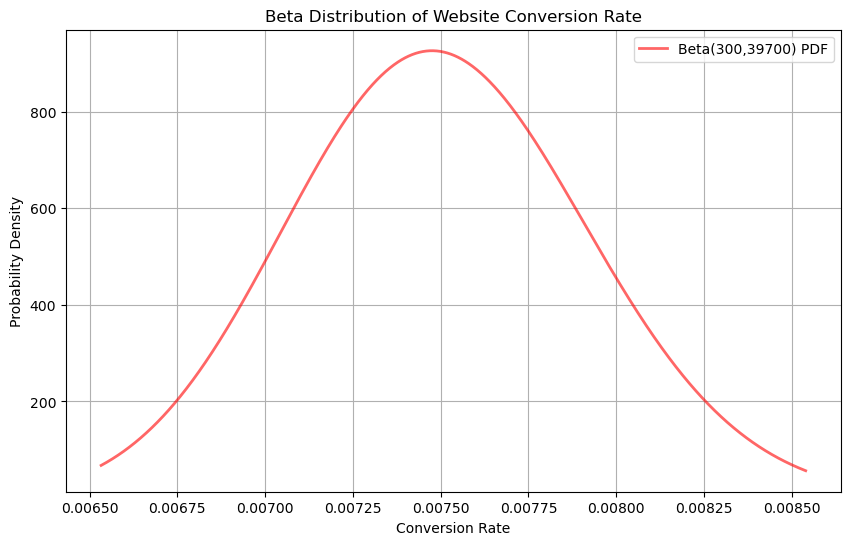

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the beta distribution
a, b = 300, 39700

# Define the range of x values
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 1000)

# Calculate the beta PDF values
y = beta.pdf(x, a, b)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-', lw=2, alpha=0.6, label=f'Beta({a},{b}) PDF')
plt.xlabel('Conversion Rate')
plt.ylabel('Probability Density')
plt.title('Beta Distribution of Website Conversion Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()


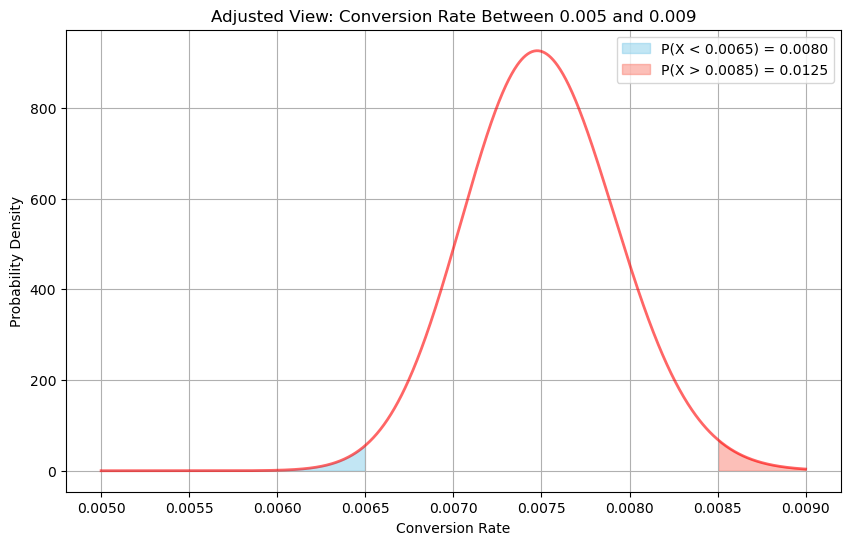

In [7]:
# Adjusting the range of x values to be between 0.005 and 0.009
x_adjusted = np.linspace(0.005, 0.009, 1000)
y_adjusted = beta.pdf(x_adjusted, a, b)

# Recalculating the shaded areas with the adjusted range
plt.figure(figsize=(10, 6))

# Fill the areas under the curve based on the new criteria
plt.fill_between(x_adjusted, y_adjusted, where=(x_adjusted < 0.0065), color='skyblue', alpha=0.5, label=f'P(X < 0.0065) = {prob_less_than_0065:.4f}')
plt.fill_between(x_adjusted, y_adjusted, where=(x_adjusted > 0.0085), color='salmon', alpha=0.5, label=f'P(X > 0.0085) = {prob_greater_than_0085:.4f}')

# Plot the beta distribution with the adjusted x-axis range
plt.plot(x_adjusted, y_adjusted, 'r-', lw=2, alpha=0.6)
plt.xlabel('Conversion Rate')
plt.ylabel('Probability Density')
plt.title('Adjusted View: Conversion Rate Between 0.005 and 0.009')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()






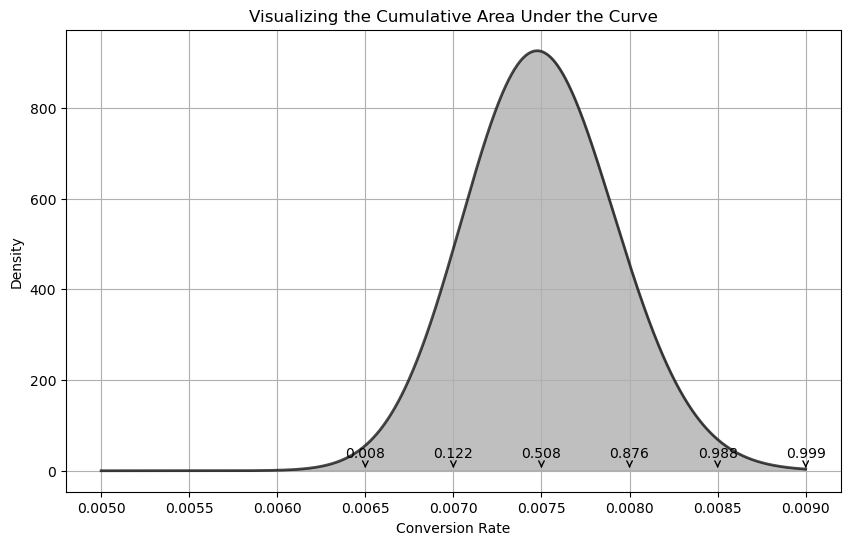

In [8]:
# Recalculating the beta distribution for the new x-axis range
x_cumulative = np.linspace(0.006, 0.009, 7)  # Increment by 0.0005 from 0.006 to 0.009
y_cumulative = beta.pdf(x_cumulative, a, b)

# Calculate the cumulative distribution values for the increments
cumulative_probs = beta.cdf(x_cumulative, a, b)

# Plot the beta distribution and cumulative areas
plt.figure(figsize=(10, 6))
plt.plot(x_adjusted, y_adjusted, 'k-', lw=2, alpha=0.7)

# Fill the area under the curve
plt.fill_between(x_adjusted, y_adjusted, color='grey', alpha=0.5)

# Mark the cumulative probability values on the plot
for i, (x_val, y_val, prob) in enumerate(zip(x_cumulative, y_cumulative, cumulative_probs)):
    if i == 0:  # Skip the first point to only show increments
        continue
    plt.annotate(f'{prob:.3f}', xy=(x_val, 0), xytext=(x_val, 30),
                 textcoords='data', ha='center', color='black',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'))

# Additional settings for the plot to match the given image style
plt.title('Visualizing the Cumulative Area Under the Curve')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()


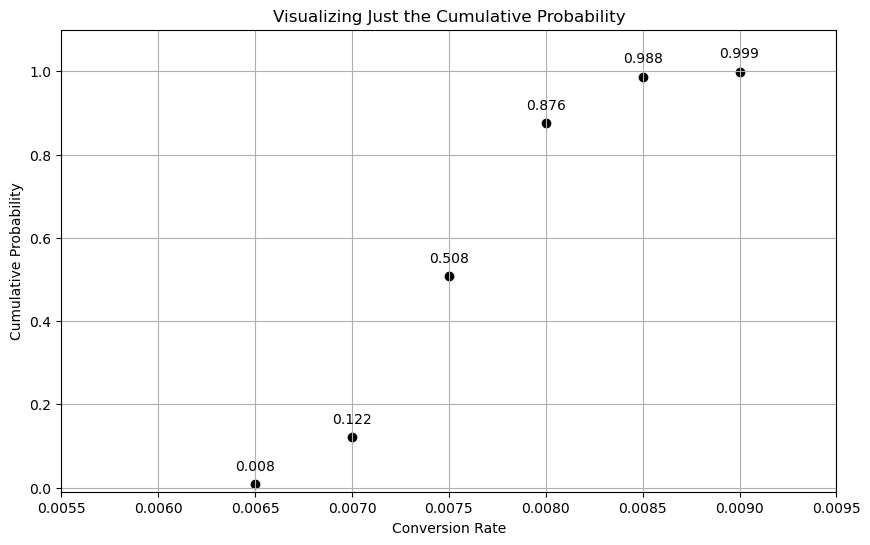

In [18]:
# Plot just the cumulative probabilities with labels and more room at the bottom
plt.figure(figsize=(10, 6))

# Scatter plot of the cumulative probabilities
plt.scatter(x_cumulative[1:], cumulative_probs[1:], color='black')

# Annotating the cumulative probabilities
for i, txt in enumerate(cumulative_probs[1:]):
    plt.annotate(f'{txt:.3f}', (x_cumulative[i + 1], cumulative_probs[i + 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Additional settings for the plot to match the given image style and adjustments
plt.title('Visualizing Just the Cumulative Probability')
plt.xlabel('Conversion Rate')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.ylim(-0.01, 1.1)  # Set y-axis to range from 0 to 1
plt.xlim(0.0055, 0.0095)  # Add more room on the x-axis
plt.show()



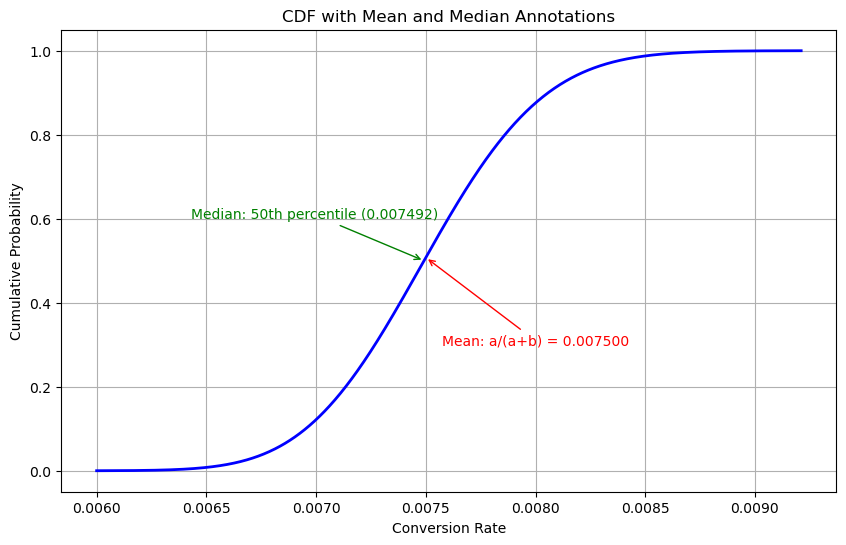

In [19]:
# Define the range for the x-axis to include mean and median annotations
x_full_range = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 1000)
y_cdf_full_range = beta.cdf(x_full_range, a, b)

# Calculate the mean and median again
mean = beta.mean(a, b)
median = beta.ppf(0.5, a, b)

# Plot the CDF with mean and median annotations
plt.figure(figsize=(10, 6))
plt.plot(x_full_range, y_cdf_full_range, 'b-', lw=2)

# Annotate the median on the plot
plt.annotate(f'Median: 50th percentile ({median:.6f})', xy=(median, 0.5), xytext=(median-0.0005, 0.6),
             textcoords='data', ha='center', color='green',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green'))

# Annotate the mean on the plot
plt.annotate(f'Mean: a/(a+b) = {mean:.6f}', xy=(mean, beta.cdf(mean, a, b)), xytext=(mean+0.0005, 0.3),
             textcoords='data', ha='center', color='red',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red'))

# Additional settings for the plot
plt.title('CDF with Mean and Median Annotations')
plt.xlabel('Conversion Rate')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()








The Median and the Mean in the previous CDF are very close implying that the beta is evenly distributed and not impacted by extreme values.